# OpenEars - getting testdata from Sensemakers IoT Platform

## Contents
1. Intro
2. Test setup
3. Getting raw data from Sensemakers IoT Platform
4. Selecting and cleaning data
5. Store the testdata
6. Testresults

## 1. Intro

With this Notebook one can get (test) data from the Sensemakers IoT Platform and load it into a Pandas df. 

As of now, you'll need to start the RPi manually and keep the microphone close to a speaker.
Starting the Pi remotely is not (yet) possible.

#### Flowchart
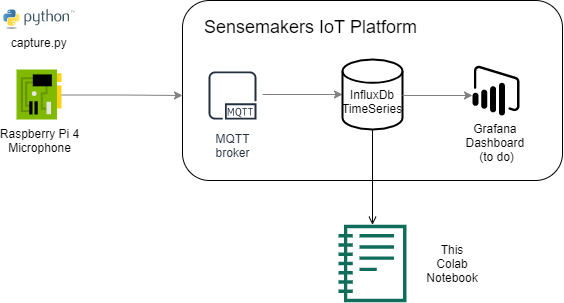

#### Links:
OpenEars GitHub Sensemakers - https://github.com/sensemakersamsterdam/OpenEars
Sensemakers IoT Platform - https://github.com/sensemakersamsterdam/sensemakers-iot-platform

#### To do
- ...

## 2. Test setup

We will use the following video for sounds to test the OpenEars sensor.

### Test procedure.
1. Manually start the Raspberry and keep the microphone close to the loudspeaker.
2. Run the script 'capture_mqtt.py' (in folder devicehive.dev).
3. When the logger displays 'Start recording', start the Youtube video below.
4. Stop the script and the youtube film after 3 minutes, this is for 12 records.
5. Follow the cells below to get the data from the Sensemakers IoT Platform

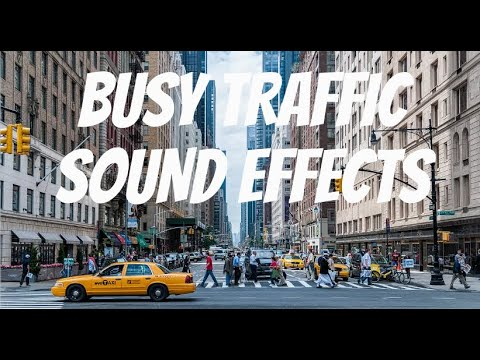

In [3]:
# show the video used in this test
from IPython.lib.display import YouTubeVideo
YouTubeVideo('-rvc63Ez6DM')

## 3. Getting raw data from Sensemakers IoT Platform and write to Pandas Dataframe

## This one got an issue with the influxdb package!

In [28]:
#source: https://github.com/sensemakersamsterdam/sensemakers-iot-platform/tree/master/scripts
# -*- coding: utf-8 -*-
"""Read data from InfluxDB into Pandas DataFrame."""

from influxdb import DataFrameClient
import os

influxdb_host = "influxdb.sensemakersams.org"
influxdb_port = 443
influxdb_user = "openears"
influxdb_password = os.environ.get('open_ears_pw')
influxdb_dbname = "iot"

client = DataFrameClient(
    influxdb_host,
    influxdb_port,
    influxdb_user,
    influxdb_password,
    influxdb_dbname,
    ssl=True,
    verify_ssl=True,
)

# Query returns a dictionary of dataframes.
rs = client.query(
    "SELECT * FROM /.*/ WHERE app_id='openears' AND dev_id='OE001' ", chunked=True, chunk_size=100 #00
)
print(rs.keys())

# Specify the data you want to retrieve.
df = rs["openears/OE001"] # syntax: app_id/dev_id. 
print(df.tail(12)) #change this parameter to select the last number of records

dict_keys(['openears/OE001'])
                                  Accelerating, revving, vroom  Aircraft  \
2021-05-08 06:10:44.227000+00:00                           NaN       NaN   
2021-05-08 06:10:59.266000+00:00                           NaN       NaN   
2021-05-08 06:11:14.284000+00:00                           NaN       NaN   
2021-05-08 06:11:29.344000+00:00                           NaN       NaN   
2021-05-08 06:11:44.375000+00:00                      0.103286       NaN   
2021-05-08 06:11:59.411000+00:00                           NaN       NaN   
2021-05-08 06:12:14.460000+00:00                           NaN       NaN   
2021-05-08 06:12:29.519000+00:00                           NaN   0.13381   
2021-05-08 06:12:44.530000+00:00                           NaN       NaN   
2021-05-08 06:12:59.614000+00:00                           NaN       NaN   
2021-05-10 18:40:52.163000+00:00                           NaN       NaN   
2021-05-10 18:41:06.863000+00:00                          

In [17]:
# not working
df

,"Accelerating, revving, vroom",Aircraft,Dog,Emergency vehicle,"Gunshot, gunfire",Motor vehicle (road),Motorcycle,Police car (siren),Tools,app_id,cpu temp,dev_id,humidity,temperature,wifi signal
2021-05-05 17:39:41.833000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,openears,None,OE001,42.0,42.0,NaN
2021-05-05 17:41:58.909000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,openears,None,OE001,42.0,42.0,NaN
2021-05-07 08:33:53.775000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,openears,None,OE001,42.0,42.0,NaN
2021-05-07 09:38:08.737000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,openears,None,OE001,42.0,42.0,NaN
2021-05-07 09:42:03.625000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,openears,50.6,OE001,NaN,NaN,-59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-08 06:12:29.519000+00:00,NaN,0.13381,NaN,NaN,NaN,0.133384,NaN,NaN,NaN,openears,None,OE001,NaN,NaN,NaN
2021-05-08 06:12:44.530000+00:00,NaN,NaN,NaN,NaN,NaN,0.236053,NaN,NaN,NaN,openears,None,OE001,NaN,NaN,NaN
2021-05-08 06:12:59.614000+00:00,NaN,NaN,0.113732,NaN,NaN,NaN,NaN,NaN,NaN,openears,None,OE001,NaN,NaN,NaN
2021-05-10 18:40:52.163000+00:00,NaN,NaN,0.666778,NaN,NaN,NaN,NaN,NaN,NaN,openears,None,OE001,NaN,NaN,NaN


## 4. Data selection and cleaning

In [75]:
df.columns # show all columns

Index(['Accelerating, revving, vroom', 'Aircraft', 'Dog', 'Emergency vehicle',
       'Gunshot, gunfire', 'Motor vehicle (road)', 'Motorcycle',
       'Police car (siren)', 'Tools', 'app_id', 'cpu temp', 'dev_id',
       'humidity', 'temperature', 'wifi signal'],
      dtype='object')

In [76]:
#drop non-relevant columns
df_testdata = df.drop(['app_id', 'cpu temp', 'dev_id','humidity', 'temperature', 'wifi signal'], axis=1) 

In [77]:
df_testdata =df_testdata.tail(12) #use only the relevant rows

In [78]:
df_testdata

,"Accelerating, revving, vroom",Aircraft,Dog,Emergency vehicle,"Gunshot, gunfire",Motor vehicle (road),Motorcycle,Police car (siren),Tools
2021-05-08 06:10:14.128000+00:00,NaN,NaN,NaN,NaN,NaN,0.176449,NaN,NaN,NaN
2021-05-08 06:10:29.180000+00:00,NaN,NaN,NaN,NaN,NaN,0.198863,NaN,NaN,NaN
2021-05-08 06:10:44.227000+00:00,NaN,NaN,NaN,0.288484,NaN,NaN,NaN,0.164037,NaN
2021-05-08 06:10:59.266000+00:00,NaN,NaN,NaN,NaN,NaN,0.125431,NaN,NaN,NaN
2021-05-08 06:11:14.284000+00:00,NaN,NaN,NaN,NaN,NaN,0.170235,NaN,NaN,NaN
2021-05-08 06:11:29.344000+00:00,NaN,NaN,NaN,NaN,NaN,0.126141,NaN,NaN,NaN
2021-05-08 06:11:44.375000+00:00,0.103286,NaN,NaN,NaN,NaN,0.115811,NaN,NaN,NaN
2021-05-08 06:11:59.411000+00:00,NaN,NaN,NaN,NaN,NaN,0.132011,NaN,NaN,NaN
2021-05-08 06:12:14.460000+00:00,NaN,NaN,0.118204,NaN,NaN,0.137285,NaN,NaN,NaN
2021-05-08 06:12:29.519000+00:00,NaN,0.13381,NaN,NaN,NaN,0.133384,NaN,NaN,NaN


## 4b. Store the results as a .csv

In [79]:
#CHANGE THE NAME OF THE FILE FORMAT: OEtest_YYMMDD_name.csv
df_testdata.to_csv('OEtest_210506_youtubetraffic.csv')

## 5. Test results

In [ ]:
# !!! Only use this cell when you want to retrieve old test data!!!!
import pandas as pd

df_testdata=pd.read_csv('OEtest_210506_youtubetraffic.csv') #change name to select file
df_testdata.head()

In [82]:
import pandas as pd
result_df = pd.DataFrame(columns = ['Class' , 'Prediction'])
result_df['Class'] = df_testdata.idxmax(axis=1) # get the name of the column
result_df['Prediction'] = df_testdata.max(axis=1) # get the highest value per row
result_df #show the resultss

,Class,Prediction
2021-05-08 06:10:14.128000+00:00,Motor vehicle (road),0.176449
2021-05-08 06:10:29.180000+00:00,Motor vehicle (road),0.198863
2021-05-08 06:10:44.227000+00:00,Emergency vehicle,0.288484
2021-05-08 06:10:59.266000+00:00,Motor vehicle (road),0.125431
2021-05-08 06:11:14.284000+00:00,Motor vehicle (road),0.170235
2021-05-08 06:11:29.344000+00:00,Motor vehicle (road),0.126141
2021-05-08 06:11:44.375000+00:00,Motor vehicle (road),0.115811
2021-05-08 06:11:59.411000+00:00,Motor vehicle (road),0.132011
2021-05-08 06:12:14.460000+00:00,Motor vehicle (road),0.137285
2021-05-08 06:12:29.519000+00:00,Aircraft,0.133810
